Coordinates for h == 0: (array([49]), array([74])) where x = [0.98989899], y = [0.97979798]


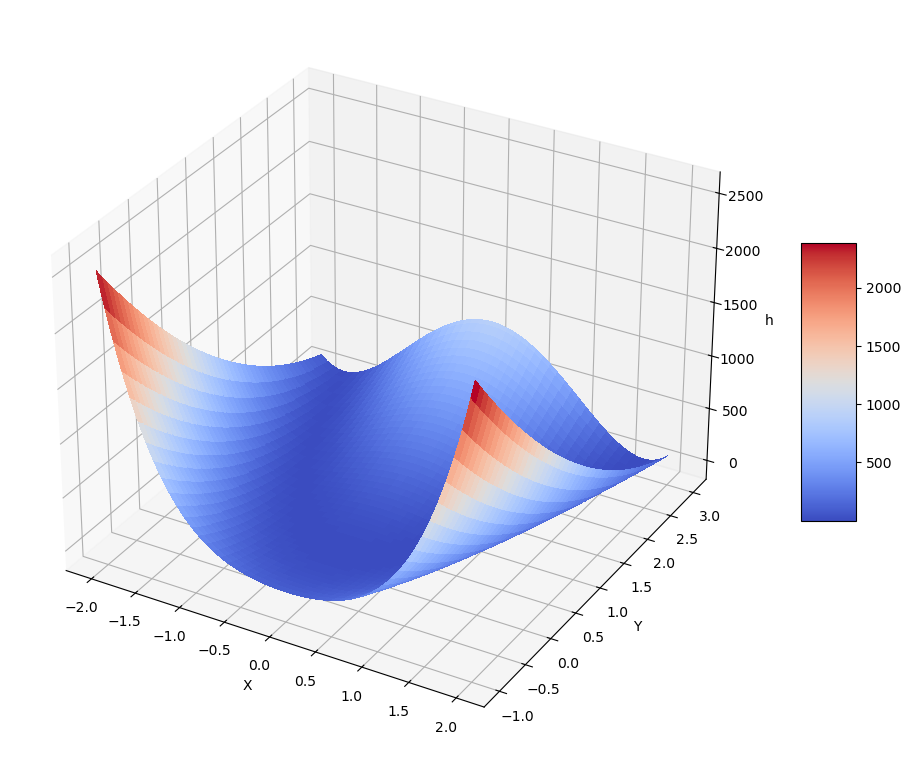

Current iteration: 1, exploring eta: 0.000000
Current iteration: 2, exploring eta: 0.000000
Current iteration: 3, exploring eta: 0.000000
Current iteration: 4, exploring eta: 0.000000
Current iteration: 5, exploring eta: 0.000000
Current iteration: 6, exploring eta: 0.000000
Current iteration: 7, exploring eta: 0.000000
Current iteration: 8, exploring eta: 0.000000
Current iteration: 9, exploring eta: 0.000000
Current iteration: 10, exploring eta: 0.000000
Current iteration: 11, exploring eta: 0.000000
Current iteration: 12, exploring eta: 0.000000
Current iteration: 13, exploring eta: 0.000000
Current iteration: 14, exploring eta: 0.000000
Current iteration: 15, exploring eta: 0.000000
Current iteration: 16, exploring eta: 0.000000
Current iteration: 17, exploring eta: 0.000000
Current iteration: 18, exploring eta: 0.000000
Current iteration: 19, exploring eta: 0.000000
Current iteration: 20, exploring eta: 0.000000
Current iteration: 21, exploring eta: 0.000000
Current iteration: 22,

In [ ]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12, 12))
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
x, y = np.meshgrid(x, y)
h = 100*np.power(y-np.power(x, 2), 2)+np.power(1-x, 2)
indices = np.where(h < 0.001)
x_zero = x[indices]
y_zero = y[indices]
print(f"Coordinates for h == 0: {indices} where x = {x_zero}, y = {y_zero}")
surf = ax.plot_surface(x, y, h, cmap = cm.coolwarm, linewidth= 0, antialiased = False)
ax.scatter(-1, 1, 0, color='red', s=50)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("h")
fig.colorbar(surf, shrink=0.3, aspect=5)
plt.show()
def h(x, y):
    return 100 * (y-x**2)**2 + (1-x)**2

def gradient_h(x, y):
    dh_dx = -400*x*(y-x**2)-2*(1-x) 
    dh_dy = 200*(y-x**2)
    return np.array([dh_dx, dh_dy])

eta_values = np.logspace(-10, 1, num=100000)
max_iterations = 10000
target_h = 1e-4

x_start = -1
y_start = 1

results = np.empty((len(eta_values), 5), dtype=object)

for idx, eta in enumerate(eta_values):
    print(f"Current iteration: {idx+1}, exploring eta: {eta:.6f}")
    x_current = x_start
    y_current = y_start
    h_current = h(x_current, y_current)
    min_h = h_current
    min_h_iter = 0

    diverged = False
    for i in range(max_iterations):
        grad = gradient_h(x_current, y_current)

        x_new = x_current - eta*(grad[0])
        y_new = y_current - eta*(grad[1])

        h_new = h(x_new, y_new)
        
        if h_new < min_h:
            min_h = h_new
            min_h_iter = i + 1

        if h_new > 1e10:
            diverged = True
            break

        x_current, y_current = x_new, y_new
        h_current = h_new
    results[idx, :] = [eta, h_current, min_h, min_h_iter, int(diverged)]
    

In [ ]:
etas = results[:, 0].astype(float)
h_currents = results[:, 1].astype(float)
min_hs = results[:, 2].astype(float)
min_h_iters = results[:, 3].astype(int)
divergeds = results[:, 4].astype(int)
successful_indices = np.where( (min_hs < target_h) & (divergeds == 0) )[0]
if successful_indices.size > 0:
    eta_good_index = successful_indices[np.argmin(min_hs[successful_indices])]
    eta_good = etas[eta_good_index]
    min_h_good = min_hs[eta_good_index]
    iter_good = min_h_iters[eta_good_index]

    if eta_good_index > 0:
        eta_smaller = etas[eta_good_index-1]
        min_h_smaller = min_hs[eta_good_index-1]
    else:
        eta_smaller = None
        min_h_smaller = None
    if eta_good_index < len(etas) - 1:
        eta_larger = etas[eta_good_index + 1]
        min_h_larger = min_hs[eta_good_index + 1]
    else:
        eta_larger = None
        min_h_larger = None
    
    print(f"Eta Good: {eta_good:.6f}, Min h: {min_h_good:.6e} at iteration {iter_good}")
    
    if eta_smaller is not None:
        print(f"Eta Smaller: {eta_smaller:.6f}, Min h: {min_h_smaller:.6e}")
    else:
        print("No smaller eta available.")

    if eta_larger is not None:
        print(f"Eta Larger: {eta_larger:.6f}, Min h: {min_h_larger:.6e}")
    else:
        print("No larger eta available.")

else:
    print("No eta achieved min_h < target_h within the search range.")
etas_non_diverge = etas[divergeds == 0]
min_hs_non_diverge = min_hs[divergeds == 0]
min_idx = np.where(min_hs_non_diverge == min_h_good)[0]
fig, ax = plt.subplots(figsize=(12, 8))

ax.loglog(etas_non_diverge, min_hs_non_diverge, 'b.-', label='Minimum h Achieved')

ax.axhline(y=target_h, color='gray', linestyle='--', label=f'Target h = {target_h}')
if min_idx.size > 0:
    ax.scatter(etas_non_diverge[min_idx], min_h_good, color='red', s=100, label=r'$\eta_{\text{good}}$')

if eta_smaller is not None:
    ax.scatter(eta_smaller, min_h_smaller, color='green', s=100, label=r'$\eta_{\text{smaller}}$')

if eta_larger is not None:
    ax.scatter(eta_larger, min_h_larger, color='orange', s=100, label=r'$\eta_{\text{larger}}$')
    
ax.set_xlabel('Learning Rate (eta)')
ax.set_ylabel('Minimum h Achieved')
ax.set_title('Minimum h Achieved vs. Learning Rate (eta)')
ax.legend()
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_ylim(bottom = 0, top= max(min_hs_non_diverge)+1e1)
plt.show()